In [1]:
#hide
%load_ext autoreload
%autoreload 2

In [ ]:
#hide
from nbdev.showdoc import *
from IPython.display import Markdown,display

# Beispielhafte Modulverwendung

In [ ]:
import nb2ltx.klauswert as klw
import pandas as pd
import matplotlib.pyplot as plt

/Users/uli/.pyenv/versions/3.7.9/envs/nb2ltx/lib/python3.7/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Daten laden

In [ ]:
pbx2020 = klw.Klauswert('rawData/KlausurPunkte.xlsx')

## Notenliste erzeugen
Erst die Daten erzeugen und dann ein Histogramm zeichnen.

In [ ]:
#hide_output
nListe = pbx2020.getNoten()
print(nListe.head().to_markdown())

|    | Name        |   Note |
|---:|:------------|-------:|
|  0 | Alexander   |    3   |
|  1 | Andre       |    3.3 |
|  2 | Celine      |    3   |
|  3 | Christian   |    3.7 |
|  4 | Christopher |    5   |


|    | Name        |   Note |
|---:|:------------|-------:|
|  0 | Alexander   |    3   |
|  1 | Andre       |    3.3 |
|  2 | Celine      |    3   |
|  3 | Christian   |    3.7 |
|  4 | Christopher |    5   |

In [ ]:
notenBuckets = pbx2020.getNotenDefinition()['Note']
notenBuckets

0     1.0
1     1.3
2     1.7
3     2.0
4     2.3
5     2.7
6     3.0
7     3.3
8     3.7
9     4.0
10    5.0
Name: Note, dtype: float64

In [ ]:
noList = []
for note in notenBuckets:
    noList.append({'Note': note, 'Anzahl': nListe[nListe['Note'] == note].count()[0]})

notenVerteilung = pd.DataFrame(noList)
display(Markdown(notenVerteilung.to_markdown()))

|    |   Note |   Anzahl |
|---:|-------:|---------:|
|  0 |    1   |        0 |
|  1 |    1.3 |        0 |
|  2 |    1.7 |        2 |
|  3 |    2   |        0 |
|  4 |    2.3 |        3 |
|  5 |    2.7 |        0 |
|  6 |    3   |        8 |
|  7 |    3.3 |        2 |
|  8 |    3.7 |        8 |
|  9 |    4   |        8 |
| 10 |    5   |        6 |

## Graphische Darstellung der Notenverteilung

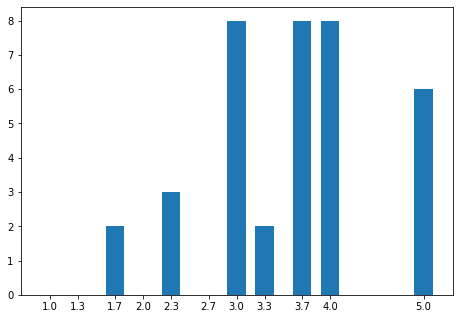

array([6., 4.])

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(notenVerteilung['Note'], notenVerteilung['Anzahl'], 0.2)
plt.xticks(notenVerteilung['Note'])
plt.show()
fig.get_size_inches()

Es geht auch etwas kleiner:

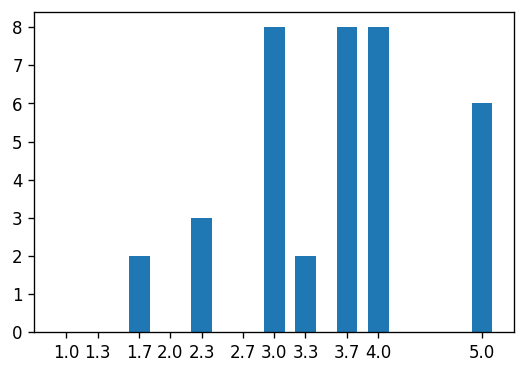

array([480. , 320.4])

In [ ]:
fig = plt.figure(figsize=(4, 2.67), dpi=120)
ax = fig.add_axes([0,0,1,1])
ax.bar(notenVerteilung['Note'], notenVerteilung['Anzahl'], 0.2)
plt.xticks(notenVerteilung['Note'])
plt.show()
fig.get_size_inches()*fig.dpi